In [103]:
import csv
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=2)

In [105]:
# opencsv(file) function to read csv data into an array given a filename as string
def opencsv(file):
    with open("".join( ["data/",file] ), 'r') as f:
        r = csv.reader(f)
        data = list(r)
    #return array of values
    return np.array(data,dtype=float)

# gaussjord_elim(mat, N) gauss-jordan elimination function
# takes an augmented matrix and N count of unknowns
def gaussjord_elim(mat,N): #where M gives a numpy matrix with integer N unknowns
    prow = 0 #pivot row
    x = np.zeros(N) #array of size N
    
    for prow in range( 0,N ): #for each pivot row
        for row in range( 0,N ): #for each row
            if row != prow: #except the pivot row
                ratio = mat[ row,prow ] / mat[ prow,prow ] #find the ratio needed to gain 0 in the primary position of selected row
                for col in range( prow,N+1 ): #for each element in current row
                    if (row==3 & col == 4) :
                        print('Ratio for M31:', ratio, '\tPivot row:',prow,
                              '\nSum equals:', mat[row,col],'-',ratio,'*', mat[prow,col],'=', mat[ row,col ] - ratio * mat[ prow,col ])
                    mat[ row,col ] -= ratio * mat[ prow,col ] #M'_ij = M_ij-(R*M_kj) where N < j < k and N is the width of M
    for i in reversed(range( 0,N )): #for each element in x-vector, starting with the last
        for j in reversed(range( 0,N )): #for each row
            x[i] = (1/mat[i, i]) * mat[i, N]
    return x

# augment(values, N) takes a numpy array of x and y values and performs least squares matrix augmentation
# to solve for a polynomial of degree integer N.
def augment(values,N):
    mat = np.zeros( [N+1,N+2] ) #creates an array of zeros
    # N+1 gives the height of the augmented matrix
    for diag in range( 0,N+4 ): #for each +ve diagonal set (0, 1, 2, ..., 'height'+2)
        for htl in range( 0,N+1 ): #for the horizontal (0, 1, 2, ..., 'height'-1)                 /X/      
            for vtl in range( 0,N+1 ): #for the vertical (0, 1, 2, ..., 'height'-1)               /X/
                if htl+vtl == diag: #if (htl,vtl) lies on the +ve diagonal e.g  /X/
                    mat[ vtl,htl ] = sum_xy(values[:,0 ], diag, np.ones(values.shape[0]), 0) #set the element to sum of x^{diag}
    for i in range(0, N+1): #for the augment
        mat[i,N+1] = sum_xy(values[:,0], i, values[:,1],1)
    return mat # returns an augmented matrix

# function to find the sum of x^n*y^n for an array
def sum_xy( x,n1,y,n2 ): #takes an x-value array, y-value array and two indices
    sum = 0
    for i in range(0, x.shape[0]):
        sum += ( x[i]**n1)*(y[i]**n2 )
    return sum

a0: 3.023163654676887 
a1: 2.0145773128688695 
a2 -5.008639614058129 
a3 -0.9995942371604961


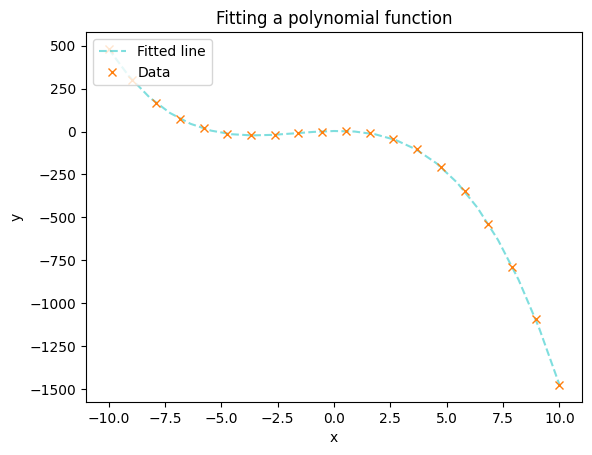

In [104]:
file = "polydata.csv" #define the filename
val = opencsv(file) #imports data into val([x],[y])
a = gaussjord_elim(augment(val,3),4)
X1, X2 = val[:,0], np.linspace(-10,10,23)
Y1, Y2 = val[:,1], (a[0] + a[1]*X2 + a[2]*X2**2 + a[3]*X2**3)
fig, ax = plt.subplots()
ax.plot(X2, Y2, color="c", alpha=0.5, linestyle='--', label='Fitted line')
ax.plot(X1, Y1, color="C1", marker='x', linestyle='none', label='Data')
ax.set_title('Fitting a polynomial function')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(loc="upper left")
print('a0:', a[0], '\na1:', a[1],
      '\na2', a[2], '\na3', a[3])

In [106]:
#define lagrange interpolator
def lagrangePoly(xofp,x,y): # 
    result = 0
    for i in range(len(x)):
        presult = 1
        for j in range(len(x)):
            if (j-i)**2 < 1:
                pass
            else:
                presult *= (xofp- x[j])/(x[i]-x[j])
        result += presult*y[i]
    return result

lagrangePoly(1.8223416145230278, val[:,0],val[:,1])
#{evaluate the curve at point x, list of x-val, list of y-val}

-15.182078046246383